# Case Study on Data Preprocessing and Correlation Function

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading of dataset

In [3]:
data = pd.read_excel("E-commerce.xlsx")

In [4]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [6]:
data.shape

(2025, 13)

# Finding Null values

In [7]:
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [8]:
data.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


# Data Cleaning and filling Null values

In [9]:
data["user_id"].fillna(method='ffill', inplace= True)

In [10]:
data["session_id"].fillna(method='ffill', inplace= True)

In [11]:
data["item_id"].fillna(method='ffill', inplace= True)

In [12]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [13]:
data['item_price'] =  data['item_price'].fillna( data['item_price'].median())

In [14]:
for i in ["category","product_type","os_version"]:
    data[i]= data[i].fillna(data[i].mode()[0])

In [15]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           1
os_version         0
is_4G              0
is_click           0
dtype: int64

In [16]:
data["app_code"].fillna(method='ffill', inplace= True)

In [17]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

# Data Encoding

**Label Encoding & One hot Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le= LabelEncoder()

In [20]:
data["device_type"].unique()

array(['android'], dtype=object)

In [27]:
df= pd.read_excel("E-commerce.xlsx")

In [28]:
df.head(20)

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0
5,2018-10-18 14:47:00,android,67352.0,268465.0,44459.0,953.0,9.0,703.0,2018-11-15 00:03:00,409.0,latest,1,0
6,2018-10-22 09:48:00,android,64356.0,295495.0,40228.0,18118.0,16.0,2537.0,2018-11-15 00:03:00,190.0,intermediate,0,0
7,2018-10-26 09:07:00,android,27329.0,675965.0,58320.0,17856.0,16.0,9641.0,2018-11-15 00:04:00,481.0,NaN,0,0
8,2018-10-26 09:08:00,android,83318.0,675965.0,129641.0,2868.0,7.0,842.0,2018-11-15 00:05:00,386.0,old,0,0
9,2018-11-04 09:14:00,android,70206.0,63432.0,64835.0,4032.0,17.0,623.0,2018-11-15 00:05:00,190.0,latest,0,0


In [29]:
df = pd.get_dummies(df)
df.head(20)

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0
5,2018-10-18 14:47:00,67352.0,268465.0,44459.0,953.0,9.0,703.0,2018-11-15 00:03:00,409.0,1,0,1,0,1,0
6,2018-10-22 09:48:00,64356.0,295495.0,40228.0,18118.0,16.0,2537.0,2018-11-15 00:03:00,190.0,0,0,1,1,0,0
7,2018-10-26 09:07:00,27329.0,675965.0,58320.0,17856.0,16.0,9641.0,2018-11-15 00:04:00,481.0,0,0,1,0,0,0
8,2018-10-26 09:08:00,83318.0,675965.0,129641.0,2868.0,7.0,842.0,2018-11-15 00:05:00,386.0,0,0,1,0,0,1
9,2018-11-04 09:14:00,70206.0,63432.0,64835.0,4032.0,17.0,623.0,2018-11-15 00:05:00,190.0,0,0,1,0,1,0


In [32]:
df.columns

Index(['server_time', 'user_id', 'session_id', 'item_id', 'item_price',
       'category', 'product_type', 'impression_time', 'app_code', 'is_4G',
       'is_click', 'device_type_android', 'os_version_intermediate',
       'os_version_latest', 'os_version_old'],
      dtype='object')

** New columns added

In [34]:
df.shape

(2025, 15)

# Correlation among data variables

In [47]:
X = df[["category","product_type","item_price","user_id"]]

In [46]:
X.corr()


,category,product_type,item_price,user_id,product_type
category,1.000000,-0.014132,0.050378,-0.021029,-0.014132
product_type,-0.014132,1.000000,-0.022924,0.007024,1.000000
item_price,0.050378,-0.022924,1.000000,0.013286,-0.022924
user_id,-0.021029,0.007024,0.013286,1.000000,0.007024
product_type,-0.014132,1.000000,-0.022924,0.007024,1.000000


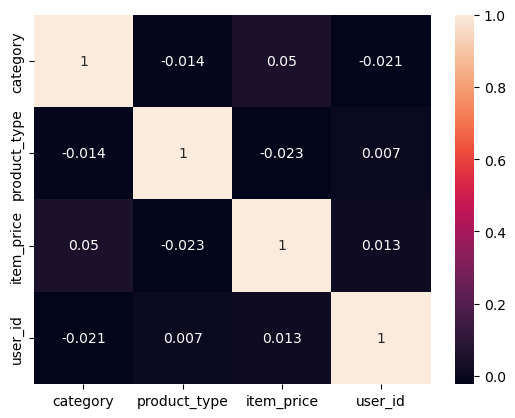

In [48]:
sns.heatmap(X.corr(),annot = True)
plt.show()

**from above correlation among data variables are weak.